In [16]:
import cv2
import numpy as np
import glob
import random

ModuleNotFoundError: No module named 'image_recognition_singlecam'

In [3]:
# Load Yolo
# net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")
# net = cv2.dnn.readNet("yolov4_tiny_training_final.weights", "yolov4-tiny-custom.cfg")
net2 = cv2.dnn.readNet("yolov4_tiny_allimages_final.weights", "yolov4_tiny_obj_det.cfg")

# Name custom object
classes = ["BallBearing"]

# Images path
#images_path = glob.glob(r"C:\Users\Saad Taslaq\Desktop\Monash University\Third Year\Sec Sem\ECE3091\ComputerVision\Test_images\Datasets\Labels2\frames\framesjpg\*.jpg")
images_path = glob.glob("test__.png")

layer_names = net2.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net2.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [4]:
random.seed(10)
# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
print(images_path)
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=1, fy=1)
    height, width, channels = img.shape


    # Detecting objects
    # cv2.dnn.blobFromImage(img, scale, size, mean, swapRB, crop)
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    print("blob = ",blob.shape)

    net2.setInput(blob)
    outs = net2.forward(output_layers)

#     print("outs =", outs)
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:

                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
#                 print("boxes= ",boxes)
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.3)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            print("x = ", x)
            print("y = ", y)

            # Label for the box since we have one class here it's only ballbearing

            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 1, color, 2)


    cv2.imshow("Image", img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()

['test__.png']
blob =  (1, 3, 416, 416)
x =  449
y =  156


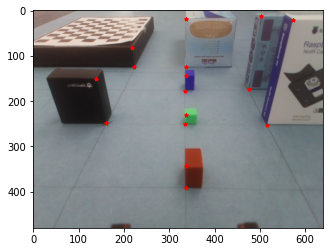

True
[[ 0.27315285]
 [-0.0018574 ]
 [ 1.60078196]]
[[  -78.03906166]
 [ -324.04416522]
 [-1293.70102454]]
[[-0.07803906]
 [-0.32404417]
 [-1.29370102]]


In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv2.imread("image.png")
size = img.shape

plt.imshow(img)

# Check the points
# grod is 100mm by 100mm
# x = 300mm y = 0mm z = 25mm
# 

points_2D = np.array(
    [   
        (338, 344),
        (336, 230),
        (336, 144),
        (139, 152),
        (573, 21),
        (503, 13),
        (218, 83),
        (338, 18),
        (336.9, 390.6),
        (335, 251),
        (335, 176.5),
        (160.6, 249.1),
        (516.1, 251.9),
        (475.6, 173.7),
        (222.8, 124.6),
        (336, 125.6),
    ],
    dtype="double",
)
xVec = []
yVec = []

for i in range(0, 16):
    xVec.append(points_2D[i][0])
    yVec.append(points_2D[i][1])

plt.plot(xVec, yVec, "*", markersize=4, color="r")
plt.show()

points_3D = np.array(
    [
        (300, 0, 250),   #Red
        (400, 0, 150),   #Green
        (500, 0, 250),    # Blue
        (400, -100, 610),  
        (400, 100, 120),
        (500, 100, 107),
        (600, 0, 870),
        (600, -100, 360),
        (300, 0, 0),
        (400, 0, 0),
        (500, 0, 0),
        (400, -100, 0),
        (400, 100, 0),
        (500, 100, 0),
        (600, 0, 0),
        (600, -100, 0),
    ],
    dtype="double",
)

dist_coeffs = np.zeros((4, 1))

focal_length = size[1]
center = (size[1] / 2, size[0] / 2)
camera_matrix = np.array(
    [[focal_length, 0, center[0]], [0, focal_length, center[1]], [0, 0, 1]],
    dtype="double",
)

(success, rotation_vector, translation_vector) = cv2.solvePnP(
    points_3D, points_2D, camera_matrix, dist_coeffs, flags=0
)
# print(success)
print(rotation_vector)
print(translation_vector)
translation_vector_m = translation_vector / 1000
print(translation_vector_m)


In [74]:
# class camera_realtimeXYZ:

#camera variables
rotation_vectors = np.concatenate((np.zeros((3,2), dtype=int), rotation_vector), axis=1)
print(rotation_vectors)
cam_mtx=camera_matrix
newcam_mtx=camera_matrix
tvec1=translation_vector
R_mtx=rotation_vectors


#images
img = cv2.imread(img_path)
size = img.shape
scalingfactor = size[1]


inverse_newcam_mtx = np.linalg.inv(newcam_mtx)
print(inverse_newcam_mtx.shape)
inverse_R_mtx = np.linalg.inv(R_mtx)


def calculate_XYZ(u,v):

    #Solve: From Image Pixels, find World Points

    uv_1=np.array([[u,v,1]], dtype=np.float32)
    uv_1=uv_1.T
    suv_1=scalingfactor*uv_1
    xyz_c=inverse_newcam_mtx.dot(suv_1)
    xyz_c=xyz_c-self.tvec1
    XYZ=inverse_R_mtx.dot(xyz_c)

    return XYZ


[[ 0.          0.          0.27315285]
 [ 0.          0.         -0.0018574 ]
 [ 0.          0.          1.60078196]]
(3, 3)


LinAlgError: Singular matrix

In [ ]:
XYZ = calculate_XYZ(x,y)